In [17]:
import pandas as pd
path = 'https://raw.githubusercontent.com/AILAB-CEFET-RJ/cic1205/refs/heads/main/data/diamonds.csv'
diamonds = pd.read_csv(path)
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


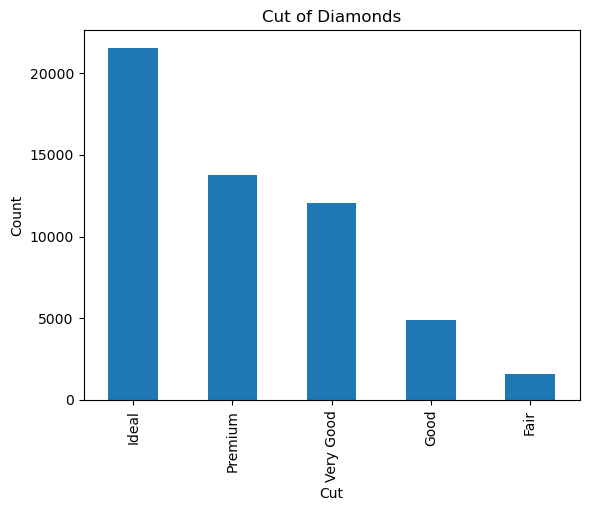

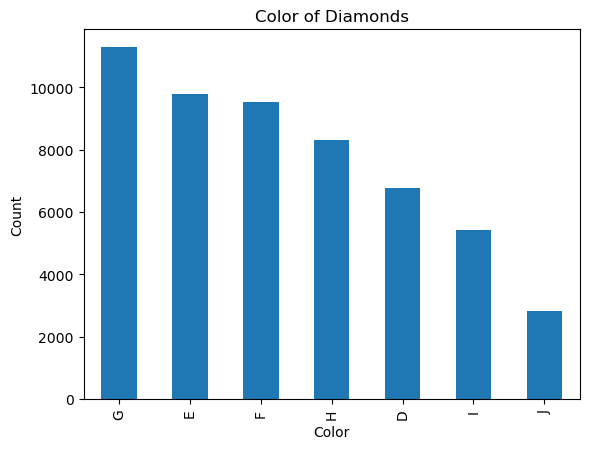

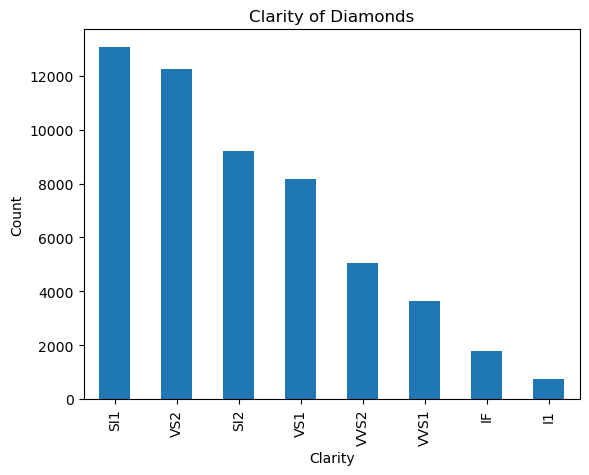

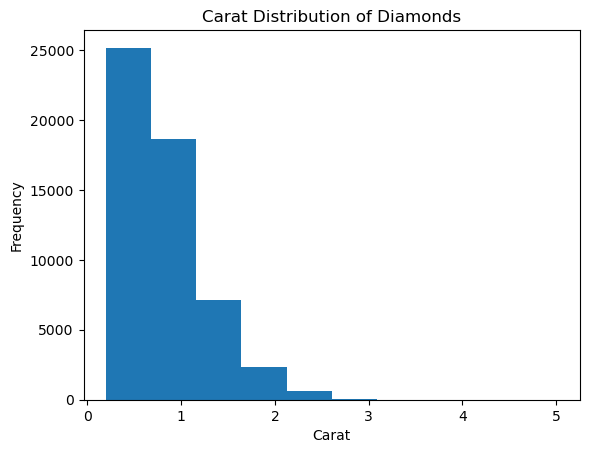

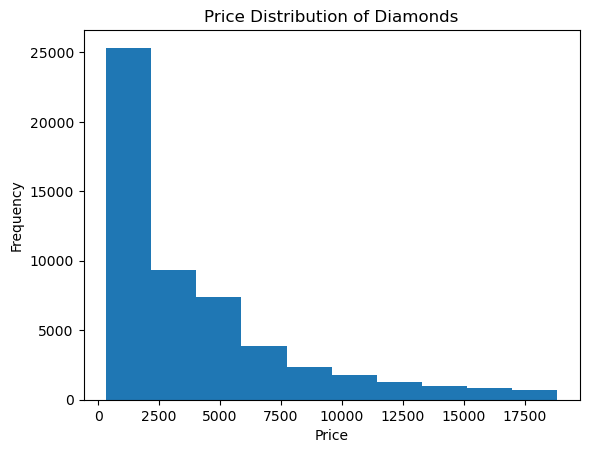

In [18]:
diamonds['cut'].value_counts().plot(kind='bar', title='Cut of Diamonds')
import matplotlib.pyplot as plt
plt.xlabel('Cut')
plt.ylabel('Count')
plt.show()
diamonds['color'].value_counts().plot(kind='bar', title='Color of Diamonds')
plt.xlabel('Color')
plt.ylabel('Count')
plt.show()
diamonds['clarity'].value_counts().plot(kind='bar', title='Clarity of Diamonds')
plt.xlabel('Clarity')
plt.ylabel('Count')
plt.show()
diamonds['carat'].plot(kind='hist', title='Carat Distribution of Diamonds')
plt.xlabel('Carat')
plt.ylabel('Frequency')
plt.show()
diamonds['price'].plot(kind='hist', title='Price Distribution of Diamonds')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

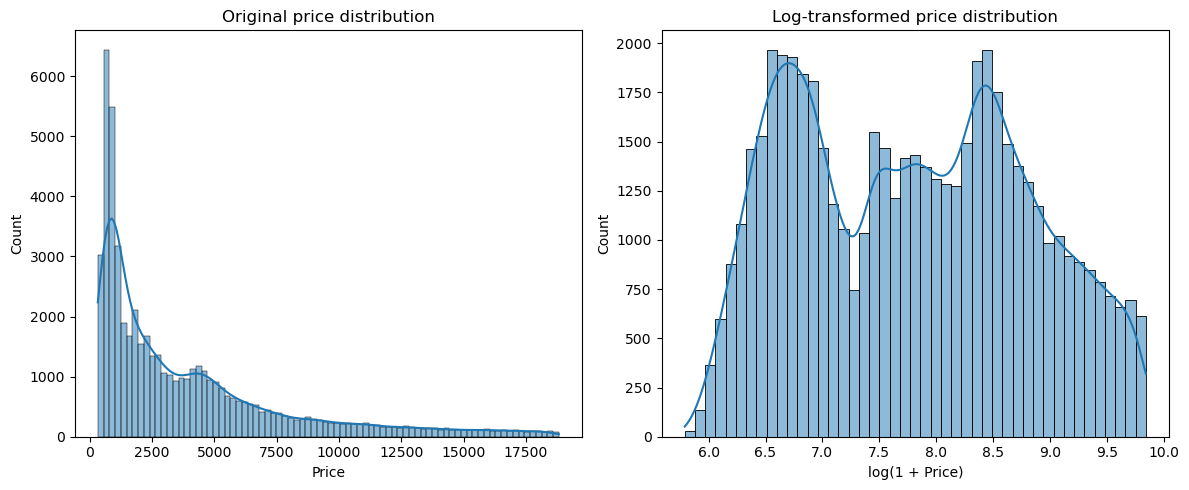

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

plt.figure(figsize=(12, 5))  # Adjust the figure size as needed

# Original distribution
plt.subplot(1, 2, 1)
sns.histplot(diamonds['price'], kde=True)
plt.title("Original price distribution")
plt.xlabel("Price")

# Log-transformed distribution
plt.subplot(1, 2, 2)
sns.histplot(np.log1p(diamonds['price']), kde=True)
plt.title("Log-transformed price distribution")
plt.xlabel("log(1 + Price)")

plt.tight_layout()
plt.show()

In [20]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder, StandardScaler

class DiamondsDataset:
    def __init__(self, dataframe: pd.DataFrame, target_column: str):
        self.df = dataframe.copy()
        self.target_column = target_column
        self.encoder = None
        self.scaler = None

        self.categorical_cols = ['cut', 'color', 'clarity']
        self.category_orders = [
            ['Fair', 'Good', 'Very Good', 'Premium', 'Ideal'],  # cut
            ['J', 'I', 'H', 'G', 'F', 'E', 'D'],                # color
            ['I1', 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF']  # clarity
        ]

    def split_train_test_val(self, test_size=0.2, val_size=0.0, random_state=42):
        X = self.df.drop(columns=[self.target_column])
        y = self.df[self.target_column]

        # First split into temp and test
        X_temp, self.X_test, y_temp, self.y_test = train_test_split(
            X, y, test_size=test_size, random_state=random_state)

        if val_size > 0:
            val_relative = val_size / (1 - test_size)
            self.X_train, self.X_val, self.y_train, self.y_val = train_test_split(
                X_temp, y_temp, test_size=val_relative, random_state=random_state)
        else:
            self.X_train, self.X_val, self.y_train, self.y_val = X_temp, None, y_temp, None

    def encode_categorical(self):
        self.encoder = OrdinalEncoder(categories=self.category_orders)

        self.X_train[self.categorical_cols] = self.encoder.fit_transform(self.X_train[self.categorical_cols])

        if self.X_val is not None:
            self.X_val[self.categorical_cols] = self.encoder.transform(self.X_val[self.categorical_cols])

        self.X_test[self.categorical_cols] = self.encoder.transform(self.X_test[self.categorical_cols])

    def scale_numeric(self):
        numeric_cols = self.X_train.select_dtypes(include='number').columns.difference([self.target_column])
        self.scaler = StandardScaler()

        self.X_train[numeric_cols] = self.scaler.fit_transform(self.X_train[numeric_cols])

        if self.X_val is not None:
            self.X_val[numeric_cols] = self.scaler.transform(self.X_val[numeric_cols])

        self.X_test[numeric_cols] = self.scaler.transform(self.X_test[numeric_cols])

    def get_train_val_test(self):
        return self.X_train, self.X_val, self.X_test, self.y_train, self.y_val, self.y_test

    def get_encoder(self):
        return self.encoder

    def get_scaler(self):
        return self.scaler


In [23]:
dataset = DiamondsDataset(diamonds, target_column='price')
dataset.split_train_test_val(test_size=0.2, val_size=0.1)
dataset.encode_categorical()
dataset.scale_numeric()

X_train, X_val, X_test, y_train, y_val, y_test = dataset.get_train_val_test()

In [22]:
X_train.head()  # Display the first few rows of the training set

,carat,cut,color,clarity,depth,table,x,y,z
26546,2.560056,-1.708965,0.347949,-1.246901,-2.550748,2.933861,2.229450,2.138209,1.738207
9159,0.447392,-0.812192,0.936621,-1.246901,-1.220426,1.139575,0.747550,0.656710,0.537733
14131,0.637532,0.084582,-0.829396,-0.032134,0.529996,0.242432,0.765404,0.700284,0.791951
15757,1.482597,-1.708965,0.936621,-1.246901,-0.170173,3.382432,1.318885,1.249310,1.243894
24632,1.524851,-0.812192,-0.240724,0.575249,0.249928,-0.206140,1.372448,1.380030,1.399249
